In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
dataset_train = pd.read_csv('forml.csv')  # 讀取
dataset_train.drop(['Unnamed: 0','date','day','month','year','D+1','D+3','D+5','D+7'],axis=1,inplace=True)
training_data = dataset_train[:7038]
test_data = dataset_train[7038:7768]
print(training_data.shape)
print(test_data.columns)
print(training_data.shape[1])

(7038, 19)
Index(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'pressure',
       'temperature', 'humidity', 'windspeed', 'wind_direction',
       'maximum_windspeed_x', 'maximum_wind_direction', 'rainfall', 'volume',
       'level', 'alarms_count', 'price'],
      dtype='object')
19


In [3]:
#sc = MinMaxScaler(feature_range=(0,1))
sc = StandardScaler()
training_data_sc = sc.fit_transform(training_data)
test_data_sc = sc.transform(test_data)
print(training_data_sc[1,18])

-0.8126060181758046


In [4]:
def createXY(dataset, n_past):
    X = []
    y = []
    for i in range(n_past, len(dataset)):
        X.append(dataset[i - n_past:i, 0:dataset.shape[1]-1])
        y.append(dataset[i,18])
    return np.array(X),np.array(y)

In [5]:
train_X, train_y = createXY(training_data_sc, 15)
test_X, test_y = createXY(test_data_sc,15)

In [6]:
# Import the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (15,18)))
#regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
#regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [7]:
# Compiling
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# 進行訓練
regressor.fit(train_X, train_y, epochs = 50, batch_size = 128)

Epoch 1/50
55/55 [==============================] - 7s 33ms/step - loss: 0.4699
Epoch 2/50
55/55 [==============================] - 2s 32ms/step - loss: 0.3360
Epoch 3/50
55/55 [==============================] - 2s 33ms/step - loss: 0.2841
Epoch 4/50
55/55 [==============================] - 2s 33ms/step - loss: 0.2354
Epoch 5/50
55/55 [==============================] - 2s 34ms/step - loss: 0.2115
Epoch 6/50
55/55 [==============================] - 2s 33ms/step - loss: 0.1824
Epoch 7/50
55/55 [==============================] - 2s 35ms/step - loss: 0.1598
Epoch 8/50
55/55 [==============================] - 2s 36ms/step - loss: 0.1472
Epoch 9/50
55/55 [==============================] - 2s 33ms/step - loss: 0.1292
Epoch 10/50
55/55 [==============================] - 2s 34ms/step - loss: 0.1231
Epoch 11/50
55/55 [==============================] - 2s 35ms/step - loss: 0.1103
Epoch 12/50
55/55 [==============================] - 2s 34ms/step - loss: 0.0983
Epoch 13/50
55/55 [==================

In [8]:
predicted_price = regressor.predict(test_X)
predicted_price_array = np.repeat(predicted_price,19,axis=-1)
pred = sc.inverse_transform(np.reshape(predicted_price_array,(len(predicted_price),19)))[:,18]
print(pred)

23/23 [==============================] - 1s 6ms/step
[16.537216  12.054458  10.892606   9.614875   9.197136   8.525783
  7.759126   5.184981   4.745871   5.2546334  6.0033116  6.1524577
  6.6034102  7.760568  14.217114  15.06966   14.451114  16.254475
 15.288933  15.998522  17.066397  14.894928  10.925616  12.068074
  8.364537   6.780149   5.463424   4.799496   5.2533393  6.37355
  7.109362  10.01771   12.7188425 12.528393  16.116743  18.837023
 16.639587  10.84897    6.820108   6.678695   6.479339   6.7003226
  6.429503   6.1140103  5.762114   6.171599   6.3619275  6.894159
  7.261416   6.9931636  6.3303046  6.6005054  7.9853854  9.745491
 11.247632  12.900355  14.187734  16.819807  16.860395  16.57286
 14.772065  15.2498    13.244456  12.242565  13.199413  12.365873
 12.794113  16.764492  15.075511  18.215002  16.851772  16.648605
 17.116549  18.948946  17.94297   17.016354  17.352049  17.682556
 15.158718  13.432462  11.835373  13.025362  13.946817  14.522848
 13.66975   12.83207   

In [9]:
real_price_array = np.repeat(test_y,19,axis=-1)
real = sc.inverse_transform(np.reshape(real_price_array,(len(test_y),19)))[:,18]

In [11]:
print(real)

[ 8.6  8.5  7.8  7.6  7.7  7.8  7.4  8.1  7.5  7.5  7.3  8.6  8.7  8.6
  8.7  8.7  9.4  8.7  9.4  9.4  8.4  7.7  7.7  7.8  7.7  8.5 11.1 13.8
  9.2 10.9 11.9  9.4  9.3  9.6  9.4 11.9 10.7 10.2 10.8 10.9 10.8  9.2
 11.6 12.2 13.7 13.9 12.  11.6 11.1 10.7 11.3 13.9 14.5 10.7 10.6 12.3
 11.6 11.2 11.4 12.4 13.4 14.5 14.7 14.9 14.5 14.8 15.9 14.8 15.6 16.4
 17.8 18.7 16.7 16.2 17.8 18.5 18.7 17.4 16.6 14.8 15.7 15.1 16.2 20.3
 20.2 17.5 18.  24.9 25.3 28.7 26.  28.6 29.7 29.  29.  36.1 38.9 40.
 37.7 32.  31.1 32.9 32.4 24.6 28.2 28.  26.4 23.  24.3 27.1 25.4 24.5
 25.5 22.  21.1 21.  22.2 25.6 24.7 26.6 22.9 25.5 26.2 23.5 23.2 26.7
 23.6 26.7 28.7 33.2 29.9 30.7 27.6 31.6 37.8 35.  31.3 30.4 31.1 32.7
 33.5 31.  35.4 36.9 38.9 41.5 35.8 35.2 30.5 33.9 30.6 39.9 49.4 36.4
 29.7 30.7 31.9 36.2 31.5 35.3 31.7 26.9 24.6 33.5 31.5 30.2 30.4 30.6
 26.8 28.  27.4 37.  30.2 28.  32.3 35.7 31.7 29.5 29.  31.3 33.5 35.
 33.6 27.9 32.9 36.3 40.7 39.6 39.1 37.7 38.1 37.5 43.2 38.2 33.4 29.8
 31.5 36

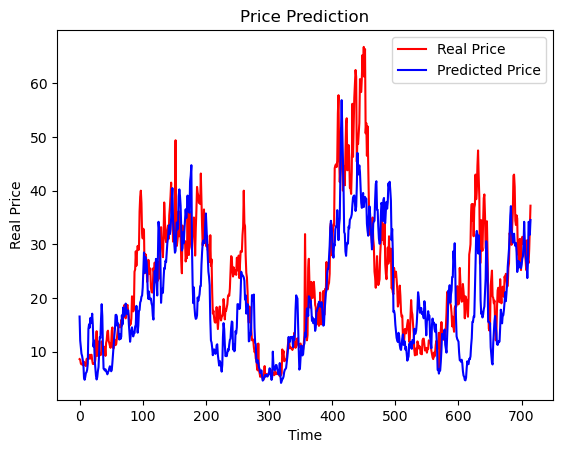

In [10]:
# Visualising the results
plt.plot(real, color = 'red', label = 'Real Price')  # 紅線表示真實股價
plt.plot(pred, color = 'blue', label = 'Predicted Price')  # 藍線表示預測股價
plt.title('Price Prediction')
plt.xlabel('Time')
plt.ylabel('Real Price')
plt.legend()
plt.show()